In [5]:
import zipfile
import numpy as np
import numpy.lib.recfunctions
import io
import matplotlib.pyplot as plt

# Load the data
with zipfile.ZipFile("statsreview_release1.zip") as zip_file:
  gamma_data = np.genfromtxt(io.TextIOWrapper(zip_file.open('data_and_materials/gamma-ray.csv')), delimiter=',', names=True)


In [14]:
## Practice
import zipfile
import numpy as np
import numpy.lib.recfunctions
import io
import matplotlib.pyplot as plt

with zipfile.ZipFile("statsreview_release1.zip") as zip_file:
    gamma_data2 = np.genfromtxt(io.TextIOWrapper(zip_file.open('data_and_materials/gamma-ray.csv')), delimiter=',', names=True)
    

In [15]:
with zipfile.ZipFile("statsreview_release1.zip") as zip_file:
    gamma_data = np.genfromtxt(io.TextIOWrapper(zip_file.open('data_and_materials/gamma-ray.csv')), delimiter=',', names=True)

print(gamma_data.dtype.names)
print(gamma_data)    

('seconds', 'count')
[( 116. , 0.) ( 112. , 0.) ( 160. , 0.) (  51.5, 0.) ( 102. , 1.)
 (  77.4, 0.) (  14.5, 0.) (1070. , 3.) (  99.1, 1.) (  49.6, 0.)
 (  50.8, 0.) (  77.2, 0.) ( 114. , 0.) ( 165. , 0.) ( 106. , 0.)
 (  52.9, 0.) ( 104. , 2.) (  51. , 2.) (  51.4, 0.) ( 316. , 2.)
 ( 687. , 4.) ( 101. , 0.) (  99.7, 0.) (  49.2, 0.) (  49.2, 1.)
 ( 104. , 0.) (  53.5, 0.) ( 124. , 0.) ( 168. , 0.) ( 109. , 0.)
 ( 107. , 1.) ( 103. , 0.) (  52.1, 0.) ( 104. , 1.) ( 656. , 5.)
 ( 111. , 1.) ( 417. , 2.) ( 149. , 1.) (  56.5, 1.) (  12.5, 0.)
 ( 101. , 1.) ( 107. , 0.) ( 113. , 1.) (  80.8, 0.) ( 110. , 0.)
 ( 109. , 0.) ( 105. , 0.) ( 104. , 1.) ( 107. , 0.) (  53.3, 0.)
 (  51.1, 0.) ( 868. , 1.) ( 105. , 0.) ( 105. , 0.) ( 103. , 2.)
 ( 104. , 0.) ( 105. , 0.) (  52.1, 0.) (  52.3, 0.) (1110. , 0.)
 (  30.4, 0.) ( 116. , 0.) (  44.9, 0.) (  46.1, 0.) (  97.9, 0.)
 ( 102. , 1.) ( 162. , 0.) ( 102. , 0.) ( 102. , 0.) (  98.7, 0.)
 (  98.7, 2.) ( 103. , 0.) (  51.6, 1.) (  53.1, 0.) (1

Part (d)

In [18]:
# For H0, the MLE estimator is a single average rate over the whole dataset
lambda_hat_H0 = gamma_data['count'].sum()/gamma_data['seconds'].sum()
# For H1, each bin has its own parameter, lambda_i, and so the MLE estimator is an array of rates for each bin
lambdas_hat_H1 = gamma_data['count']/gamma_data['seconds']
print("H0 = {}".format(lambda_hat_H0))
print("H1 = {}".format(lambdas_hat_H1))

H0 = 0.0038808514969907496
H1 = [0.         0.         0.         0.         0.00980392 0.
 0.         0.00280374 0.01009082 0.         0.         0.
 0.         0.         0.         0.         0.01923077 0.03921569
 0.         0.00632911 0.00582242 0.         0.         0.
 0.0203252  0.         0.         0.         0.         0.
 0.00934579 0.         0.         0.00961538 0.00762195 0.00900901
 0.00479616 0.00671141 0.01769912 0.         0.00990099 0.
 0.00884956 0.         0.         0.         0.         0.00961538
 0.         0.         0.         0.00115207 0.         0.
 0.01941748 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00980392
 0.         0.         0.         0.         0.02026342 0.
 0.01937984 0.         0.00232558 0.         0.01121076 0.01893939
 0.         0.         0.         0.         0.02008032 0.01964637
 0.         0.00444444 0.         0.         0.02617801 0.
 0.         0.         0.         0

Part (f-2)

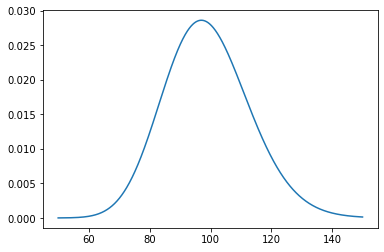

In [11]:
import scipy.stats

# Here we plot the chi^2 distribution for 99 degrees of freedom in the range of insterest (around the mean)
plot_Xs = np.arange(50,150,0.1)
plt.plot(plot_Xs, scipy.stats.chi2.pdf(plot_Xs, 99))
plt.show()

Part (f-3)

In [21]:
# The p-value for Lambda can be calculated using the survival function for the chi^2 distribution.
# Thus, we can calculate the Lambda that would give a p-value of 0.05 by using the inverse survival function
scipy.stats.chi2.isf(0.05, 99)

123.22522145336181

Part (f-4)

In [6]:

def likelihood_H0(lamb):
  # The likelihood function is a product of Poisson distributions. For H0, each Poisson distribution
  # has the same mean.
  return scipy.stats.poisson.pmf(gamma_data['count'], gamma_data['seconds']*lamb).prod(axis=0)

def likelihood_H1(lambs):
  # For H1, the means for the Poisson distributions are given by the parameter 'lambs'
  return scipy.stats.poisson.pmf(gamma_data['count'], gamma_data['seconds']*lambs).prod(axis=0)

# The test statistic for the MLE is given by calculating the likelihood ratio for the MLE estimators
# calculated earlier.
Lambda_observed = -2*np.log(likelihood_H0(lambda_hat_H0)/likelihood_H1(lambdas_hat_H1))
# Now we can use the survival function to find the p-value for the observed data
# with the MLE estimators.
pvalue = scipy.stats.chi2.sf(Lambda_observed, 99)
print(Lambda_observed, pvalue)

104.39792133021314 0.33576662402509894
